In [8]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  
from matplotlib.patches import Arc
import numpy as np
import math
import pandas

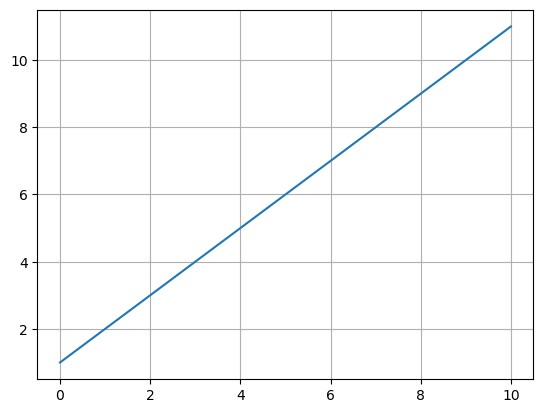

[ 0. 10.] 
 [ 1. 11.]


In [ ]:
# print('Enter your name:')
# xd = input()
# x: 0.6116857528686523
# y: 0.5885195136070251

x = np.linspace(0,10,2)
y = 1*x+1
plt.plot(x, y)

    
plt.grid()
plt.show()
print(x,"\n",y)

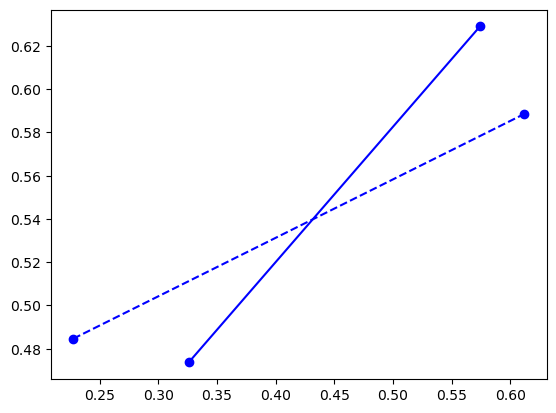

In [ ]:
point1 = [0.3258028030395508, 0.4736385941505432]
point2 = [0.5739829540252686, 0.6289869546890259]
point3 = [0.22749197483062744, 0.4846445918083191]
point4 = [0.6116857528686523, 0.5885195136070251]

x1_values = [point1[0], point2[0]]
y1_values = [point1[1], point2[1]]
x2_values = [point3[0], point4[0]]
y2_values = [point3[1], point4[1]]

plt.plot(x1_values, y1_values, 'bo', linestyle="-")
plt.plot(x2_values, y2_values, 'bo', linestyle="--")

# plt.text(point1[0], point1[1], "Point1")
# plt.text(point2[0], point2[1], "Point2")
# plt.text(point3[0], point3[1], "Point3")
# plt.text(point4[0], point4[1], "Point4")

plt.show()

In [6]:
def halfangle(a, b):
    if b < a:
        b += 360
    return (a + b)/2 % 360

def get_arc_patch(lines, radius=None, flip=False, obtuse=False, reverse=False, dec=0, fontsize=8):
    
    linedata = [np.array(line.T) for line in lines]
    #lines: list of lines, of shape [[(x0, y0), (x1, y1)], [(x0, y0), (x1, y1)]]

    scales = [np.diff(line).T[0] for line in linedata]
    #scales: difference along given point; [array([x0-y0, x1-y1]), array([x0-y0, x1-y1])]

    scales = [s[1] / s[0] for s in scales]
    #scales: divided along difference; [array([x1-y1/x0-x1]), array([x1-y1/x0-x1])]
    print("\n",scales)
    
    # Get angle to horizontal
    angles = np.array([np.rad2deg(np.arctan(s/1)) for s in scales])
    #angles; [arctan(array([x1-y1/x0-x1])), arctan(array([x1-y1/x0-x1]))]

    if obtuse:
        angles[1] = angles[1] + 180
    if flip:
        angles += 180
    if reverse:
        angles = angles[::-1]
        
    angle = abs(angles[1]-angles[0])
    #angle; abs(arctan(array([x1-y1/x0-x1]))-arctan(array([x1-y1/x0-x1])))
    print("\nang0",angles[0],"\nang1",angles[1])
    print("ang",angle)
    
    if radius is None:
        lengths = np.linalg.norm(lines, axis=(0,1))
        radius = min(lengths)/5.5
    #for adjusting radius of the arc
    
    # Solve the point of intersection between the lines:
    t, s = np.linalg.solve(np.array([line1[1]-line1[0], line2[0]-line2[1]]).T, line2[0]-line1[0])
    intersection = np.array((1-t)*line1[0] + t*line1[1])

    # Check if radius is a single value or a tuple
    try:
        r1, r2 = radius
    except:
        r1 = r2 = radius
    arc = Arc(intersection, 2*r1, 2*r2, theta1=angles[1], theta2=angles[0])
    
    half = halfangle(*angles[::-1])
    sin = np.sin(np.deg2rad(half))
    cos = np.cos(np.deg2rad(half))
    
    r = r1*r2/(r1**2*sin**2+r2**2*cos**2)**0.5
    xy = np.array((r*cos, r*sin))
    xy =  intersection + xy/2
    print("xy",xy,"r",r)
    
    textangle = half if half > 270 or half < 90 else 180 + half 
    textkwargs = {
        'x':xy[0],
        'y':xy[1],
        's':str(round(angle, dec)) + "°",
        'ha':'center',
        'va':'center',
        'fontsize':fontsize,
        'rotation':textangle
    }

    return arc, textkwargs


 [0.6259499799700848, 0.27037117136349154]

ang0 32.04450705897893 
ang1 15.129394831072576
ang 16.915112227906356
xy [0.50883795 0.57356835] r 0.16875978887847795

ax1 Text(0.5088379542597095, 0.573568352970806, '17.0°')

 [0.6259499799700848, 0.27037117136349154]

ang0 195.12939483107257 
ang1 32.04450705897893
ang 163.08488777209365
xy [0.39774387 0.61713484] r 0.16875978887847795

ax2 Text(0.39774387410591183, 0.6171348369457128, '163.0°')


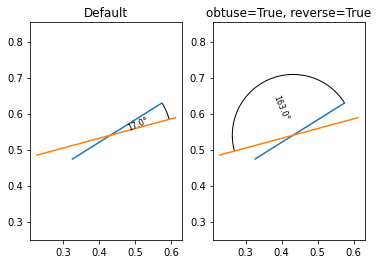

In [9]:
line1 = np.array([(0.3258028030395508, 0.4736385941505432), (0.5739829540252686, 0.6289869546890259)])
line2 = np.array([(0.22749197483062744, 0.4846445918083191), (0.6116857528686523, 0.5885195136070251)])
lines = [line1, line2]

fig, AX = plt.subplots(nrows=1, ncols=2)
for ax in AX.flatten():
    for line in lines:
        x,y = line.T
        ax.plot(x,y)
        ax.axis('equal')

ax1, ax2 = AX.flatten()

arc, angle_text = get_arc_patch(lines)
ax1.add_artist(arc)
ax1.set(title='Default')
print("\nax1",ax1.text(**angle_text))


arc, angle_text = get_arc_patch(lines, obtuse=True, reverse=True)
ax2.add_artist(arc)
ax2.set(title='obtuse=True, reverse=True')
print("\nax2",ax2.text(**angle_text))


plt.show()